# BPU
**predict whether electic batttery is failed based on the usage & operating conditions**

In [244]:
import pandas as pd
import numpy as np

In [245]:
# load dataset
df = pd.read_csv("ev_battery_failure_dataset.csv")
df.head()

,charge_cycles,avg_temperature,depth_of_discharge,fast_charge_ratio,age_months,battery_failure
0,1176,32.975425,98.890121,0.718123,20,1
1,910,35.608966,94.965341,0.955524,18,1
2,1344,41.471627,13.548413,0.018233,58,1
3,1180,36.260948,73.501766,0.195778,43,1
4,1145,16.026230,93.272349,0.007563,57,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   charge_cycles       500 non-null    int64  
 1   avg_temperature     500 non-null    float64
 2   depth_of_discharge  500 non-null    float64
 3   fast_charge_ratio   500 non-null    float64
 4   age_months          500 non-null    int64  
 5   battery_failure     500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [247]:
# split features & target
x = df.drop("battery_failure", axis = 1)
y = df["battery_failure"]

In [248]:
y.value_counts()

battery_failure
1    291
0    209
Name: count, dtype: int64

In [249]:
# Train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [250]:
# feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [272]:
# Build ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

s_model = Sequential()

# i/p + hidden layers
s_model.add(Dense(64, activation = "relu", input_shape = (x_train.shape[1],)))
s_model.add(Dropout(0.2))
s_model.add(Dense(32, activation = "relu"))
s_model.add(Dense(16, activation = "relu"))

# o/p layer
s_model.add(Dense(1, activation = "sigmoid"))

# compile model
s_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

1. Sigmoid --> o/p probability (0 to 1)
2. binary_crossentropy --> correct loss for binary classifiaction

In [261]:
# Train model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)
ann = s_model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2, callbacks = [es])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4375 - loss: 0.7189 - val_accuracy: 0.4625 - val_loss: 0.6950
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5344 - loss: 0.6910 - val_accuracy: 0.5125 - val_loss: 0.6876
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5688 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.6818
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6000 - loss: 0.6712 - val_accuracy: 0.4875 - val_loss: 0.6787
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6000 - loss: 0.6626 - val_accuracy: 0.5000 - val_loss: 0.6695
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5969 - loss: 0.6573 - val_accuracy: 0.5000 - val_loss: 0.6637
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5969 - loss: 0.6555 - val_accuracy: 0.5500 - val_loss: 0.6535
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6156 - loss: 0.6497 - val_accuracy: 0.

In [262]:
# predictions
y_pred = s_model.predict(x_test)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 


In [263]:
# performance metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion-matrix:\n ",confusion_matrix(y_test, y_pred))
print("Classification report:\n ",classification_report(y_test, y_pred))

Confusion-matrix:
  [[13 26]
 [11 50]]
Classification report:
                precision    recall  f1-score   support

           0       0.54      0.33      0.41        39
           1       0.66      0.82      0.73        61

    accuracy                           0.63       100
   macro avg       0.60      0.58      0.57       100
weighted avg       0.61      0.63      0.61       100



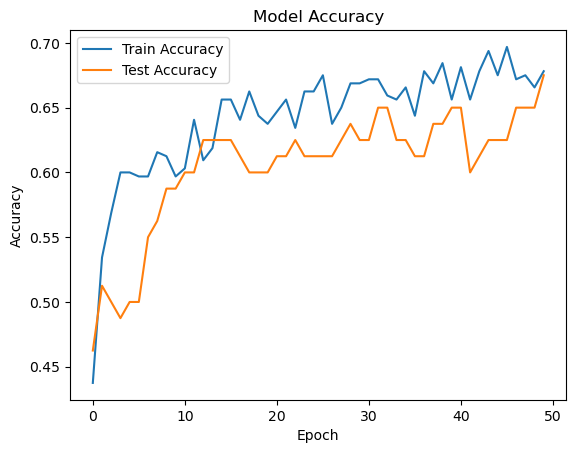

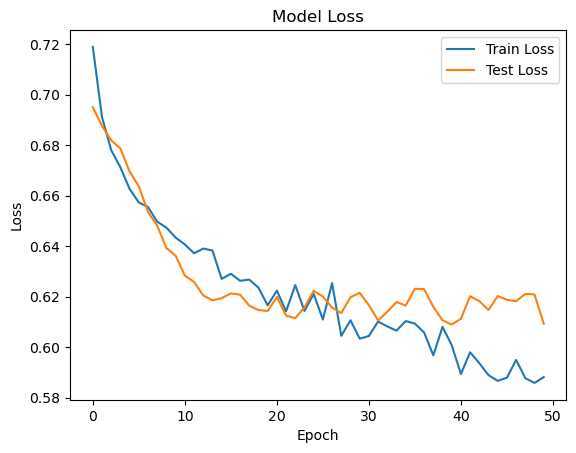

In [266]:
import matplotlib.pyplot as pp
pp.figure()
pp.plot(ann.history["accuracy"], label = "Train Accuracy")
pp.plot(ann.history["val_accuracy"], label = "Test Accuracy")
pp.title("Model Accuracy")
pp.xlabel("Epoch")
pp.ylabel("Accuracy")
pp.legend()
pp.show()

pp.figure()
pp.plot(ann.history["loss"], label = "Train Loss")
pp.plot(ann.history["val_loss"], label = "Test Loss")
pp.title("Model Loss")
pp.xlabel("Epoch")
pp.ylabel("Loss")
pp.legend()
pp.show()

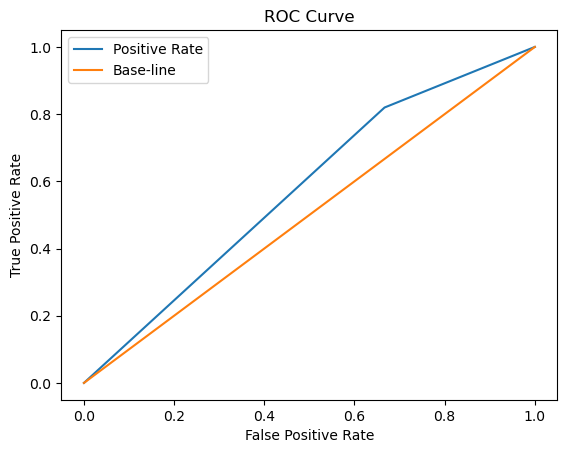

In [267]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)      # Receiver Operating Characteristic
pp.figure()
pp.plot(fpr, tpr, label = "Positive Rate")
pp.plot([0, 1], [0, 1], label = "Base-line")  # baseline
pp.xlabel("False Positive Rate")
pp.ylabel("True Positive Rate")
pp.title("ROC Curve")
pp.legend()
pp.show()

In [268]:
# Save model
s_model.save("battery_failure_ann_model.keras")

In [273]:
# load model
from tensorflow.keras.models import load_model

loaded_model = load_model("battery_failure_ann_model.keras")
sample = x_test[1].reshape(1,-1)
predictions = loaded_model.predict(sample)
print(predictions)
print(predictions > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[0.7097534]]
[[ True]]


In [274]:
import joblib
joblib.dump(ss, "scaler.pkl")


['scaler.pkl']